In [83]:
import pandas as pd
import numpy as np
import scipy as sp
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('opaque')

alt.data_transformers.disable_max_rows()
df_train = pd.read_pickle('../data/interim/holdout_lgbm.pck')

df_train.head()

,row_id,well_id,GR,label,GR_medfilt,GR_medfilt_lag_-50,GR_medfilt_lag_-45,GR_medfilt_lag_-40,GR_medfilt_lag_-35,GR_medfilt_lag_-30,...,abs_diff_sum_120_GR_medfilt,corr_parabolic_120_GR_medfilt,slope_120_GR_medfilt,mid_vs_end_120_GR_medfilt,label_0,label_1,label_2,label_3,label_4,pred
0,0,0,99.005617,0,94.464482,46.637029,50.925787,61.805139,90.687814,106.039949,...,77.278147,103658.961912,-1.308142,-36.594682,0.997843,0.000002,5.783695e-10,0.000002,0.000137,0
1,1,0,105.563944,0,95.934506,46.637029,48.627032,59.038324,79.081603,106.039949,...,77.278147,103658.961912,-1.308787,-36.673762,0.999912,0.000001,3.631824e-09,0.000005,0.000165,0
2,2,0,105.921065,0,99.005617,44.999495,47.096457,58.526148,78.165817,105.511353,...,77.278147,103659.566535,-1.307360,-36.673762,0.999973,0.000002,3.049663e-10,0.000010,0.000476,0
3,3,0,113.513354,0,101.523783,44.930711,47.096457,52.904985,69.316049,104.738936,...,77.278147,103661.985028,-1.304120,-36.673762,0.999965,0.000002,3.321680e-10,0.000006,0.000925,0
4,4,0,101.523783,0,102.486464,44.930711,47.096457,52.140537,67.978680,101.382792,...,77.801159,103667.361262,-1.300047,-36.275919,0.999891,0.000002,4.604817e-10,0.000052,0.000475,0


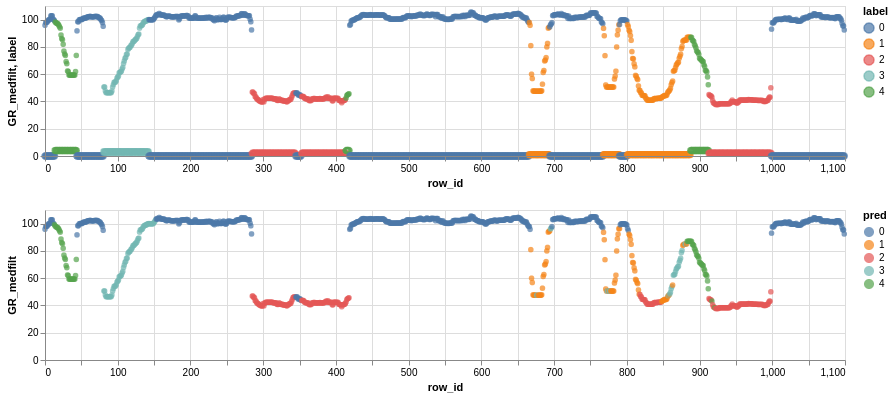

In [84]:
#well_ids = 14
well_ids = 55
#well_ids = 50

df_sub = df_train[df_train['well_id'] == well_ids]
cols = ['row_id','GR_medfilt','label','pred']
ch_gr = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='GR_medfilt',order='row_id',color='label:N').mark_point(size=30,filled=True)
ch_lab = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='label',order='row_id',color='label:N').mark_point()
ch_grp = alt.Chart(df_sub[cols],height=150,width=800).encode(x='row_id',y='GR_medfilt',order='row_id',color='pred:N').mark_point(size=30,filled=True)
((ch_gr + ch_lab) & ch_grp).resolve_scale(color='independent')

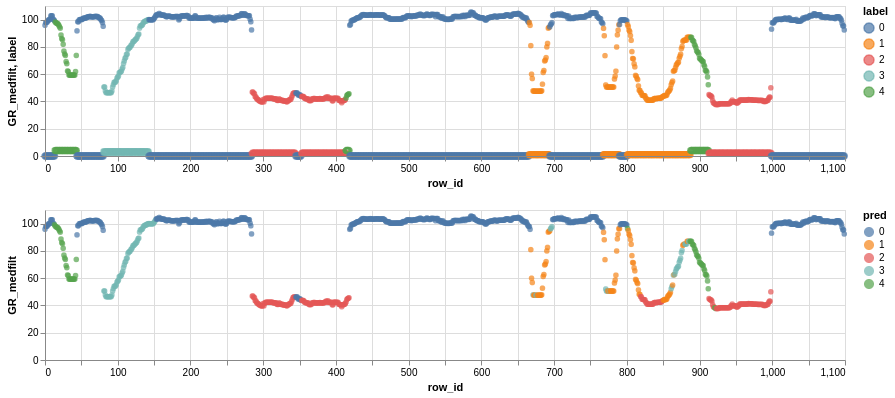

0

In [17]:
well_ids

14.0

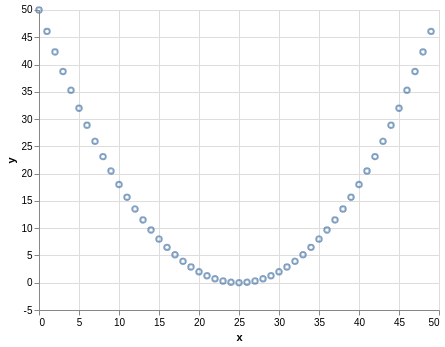

In [30]:
def make_parabolic(w,amp=50):
    x=[0,w/2,w]
    y=[amp,0,amp]
    p_coef = np.polyfit(x,y,2)
    p=np.poly1d(p_coef)
    x_new = np.arange(w)
    res = p(x_new)
    return res
    
y = make_parabolic(w=50)
tmp = pd.DataFrame({'y':y,'x':np.arange(y.shape[0])})
alt.Chart(tmp).encode(x='x',y='y').mark_point()